# Coursework D: PCA and MNIST

# Introduction:

This project investigates the integration of Principal Component Analysis (PCA) with the MNIST dataset to enhance neural network performance without retraining. Initially, we train a neural network on MNIST, achieving over 95% accuracy on the test set. We then decompose the dataset into PCA components, gradually reducing their number and assessing their impact on testing accuracy. By iteratively refining the network with reduced PCA components, we explore the efficiency gains achievable through dimensionality reduction in image classification tasks.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.15.0


1. Train a neural network on the MNIST training dataset that achieves acceptable performance on the test dataset (>95% accuracy)

In [ ]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images=train_images/255.0

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(14, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(28, activation='relu'))
model.add(keras.layers.Dense(10))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels), batch_size = 220)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 14)        140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 14)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 28)        3556      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 28)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 28)          7084      
                                                                 
 flatten (Flatten)           (None, 252)               0

2. Decompose the MNIST training dataset into its PCA components


In [ ]:
print("train_images.shape: ",np.shape(train_images))
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))
mu=np.mean(X,axis=0)
x=X-mu
#rho=np.dot(np.transpose(x),x)  #Make the covaraince matrix by hand
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
print("rho.shape:",np.shape(rho))

#Get the eigenvalues and vectors
vals,vecs=linalg.eigh(rho)
#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))
vecs=np.flip(vecs)
vals=np.flip(vals)


train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


(784,)


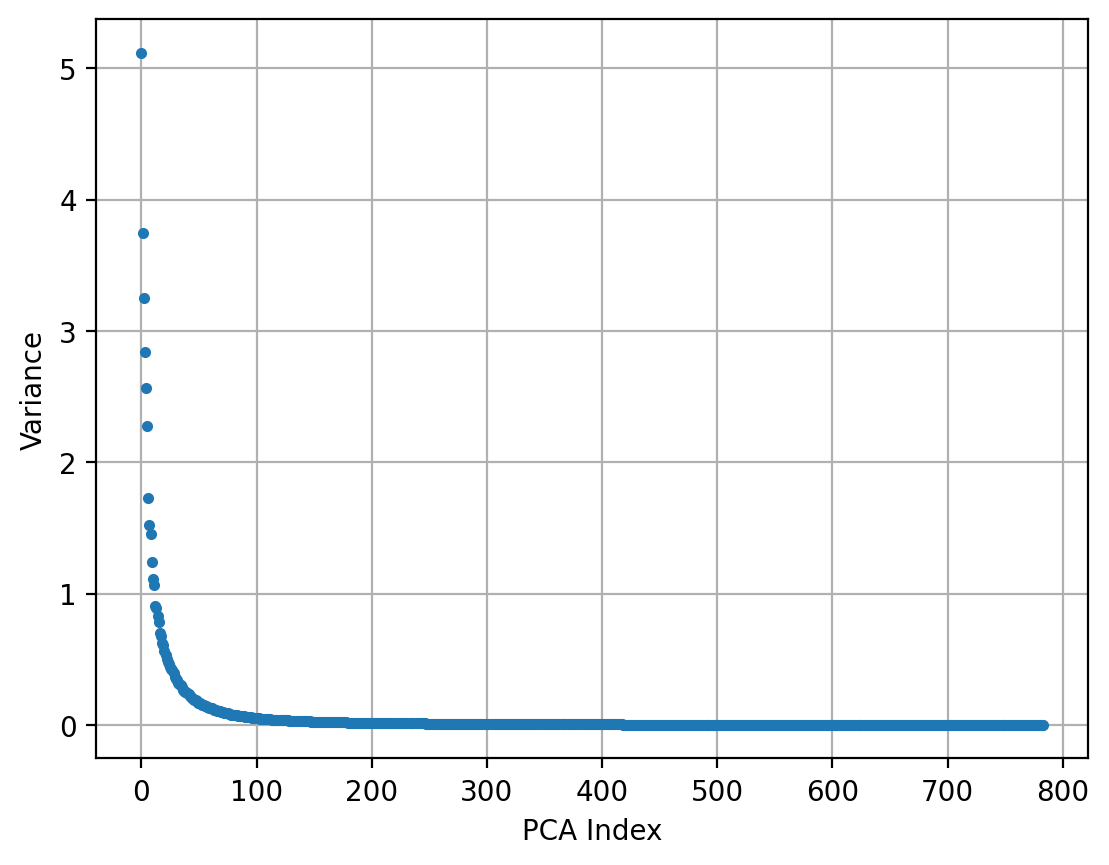

In [ ]:
print(np.shape(vals))
fig,ax=plt.subplots()
index=np.arange((np.shape(vals)[0]))
ax.plot(index,vals.real,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Variance")
ax.grid()

From this graph we can see that the first few components(appox 0-20) have the highest variances. Beyond 100 PCA components the variance is approximately 0.

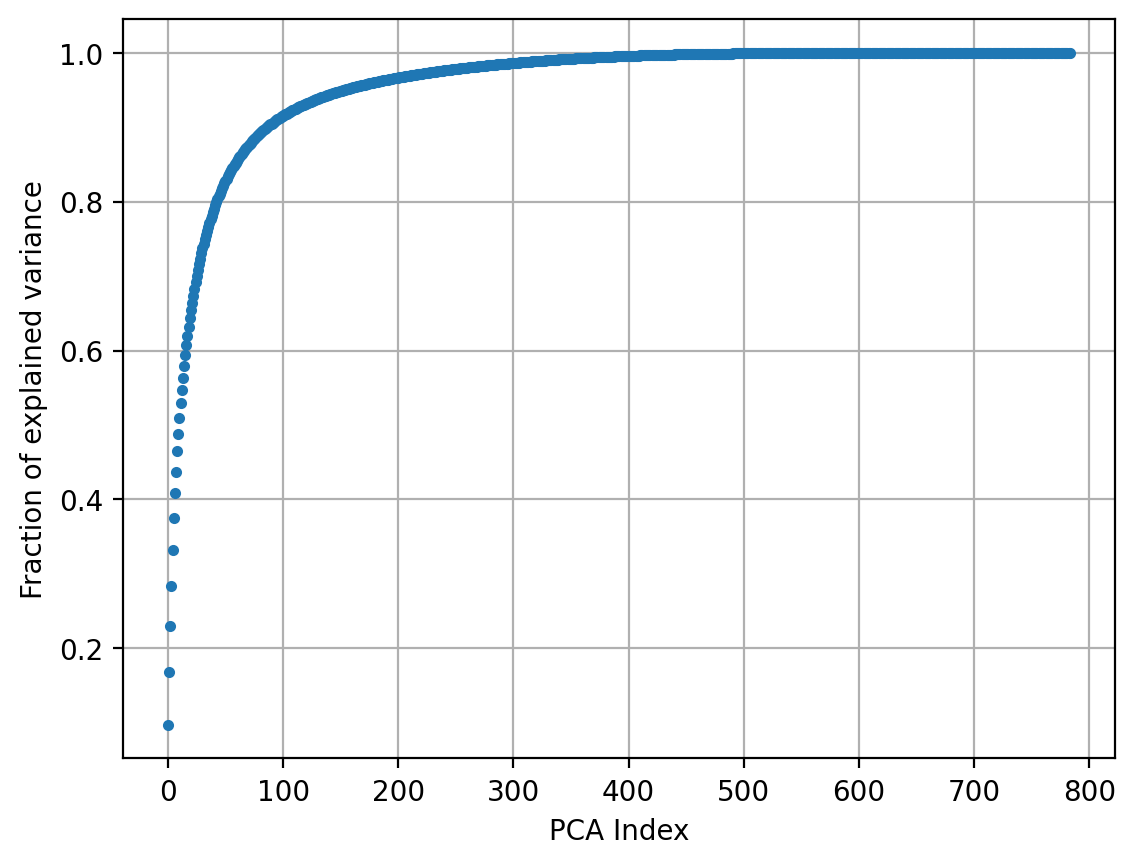

In [ ]:
fig,ax=plt.subplots()
cumsum=np.cumsum(vals.real)
cdf=cumsum/cumsum[-1]
index=np.arange((np.shape(vals)[0]))
ax.plot(index,cdf,".")
ax.set_xlabel("PCA Index")
ax.set_ylabel("Fraction of explained variance")
ax.grid()

Looking at this graph, we can see that appoximately the first 100 PCA components contribute to the 0.9 of the explained variance, whilist the rest of the components contribute only 0.1 of the explained variance.

3. Use the N-best PCA components to make a new testing dataset (using the 10,000 MNIST test images) and make a plot of N vs testing accuracy using the neural network trained in 1) *WITOUT RETRAINING THE NETWORK*

X.shape: (10000, 784)
313/313 - 2s - loss: 721.9127 - accuracy: 0.0974 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 463.0735 - accuracy: 0.3003 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 381.8121 - accuracy: 0.4621 - 2s/epoch - 7ms/step
313/313 - 2s - loss: 197.4548 - accuracy: 0.6020 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 187.6870 - accuracy: 0.6147 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 91.1606 - accuracy: 0.7998 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 63.5887 - accuracy: 0.8646 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 44.0831 - accuracy: 0.9015 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 29.4030 - accuracy: 0.9337 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 25.2396 - accuracy: 0.9391 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 21.9534 - accuracy: 0.9454 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 18.0352 - accuracy: 0.9556 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 16.8832 - accuracy: 0.9604 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 15.2753 - accuracy: 0.9632 - 2s/epoch - 5m

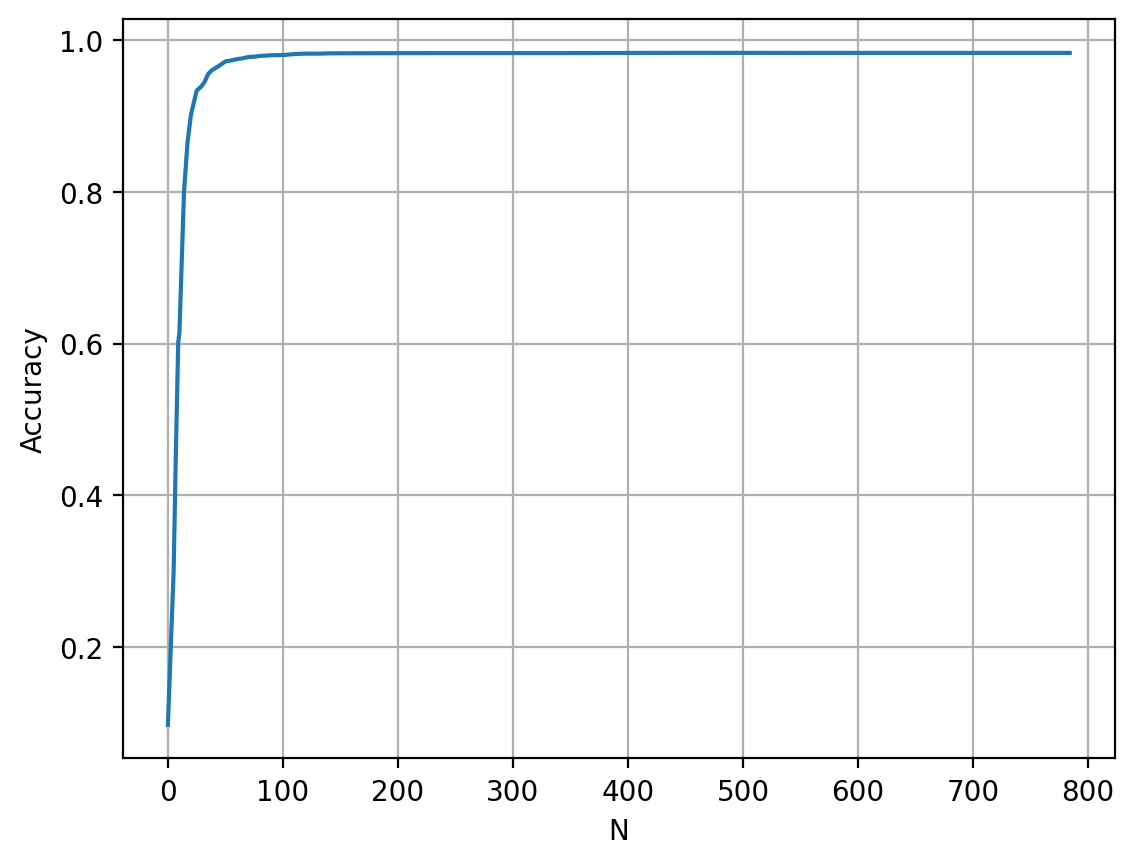

In [ ]:
X=np.reshape(test_images,(10000,784))
print("X.shape:",np.shape(X))
mu=np.mean(X,axis=0)
x=X-mu
rho=np.cov(x,rowvar=False) # Make the covaraince matrix by np.cov
vals,vecs=linalg.eigh(rho)
vecs=np.flip(vecs)
vals=np.flip(vals)

N = [0, 5, 7,9,10,14,17, 20,25,29,32,35,38,41,44,47, 50,55,60,65,70,75,80,90, 100,110,120,130,140, 150, 250, 350, 450, 600, 700, 750, 784]
test_accuracies = []

for i in N:
  P = np.dot(x, vecs)
  new_TestImageN = np.dot(P[:, 0:i], vecs.T[0:i, :]) + mu
  new_TestImageN_reshaped = np.reshape(new_TestImageN, (-1, 28, 28, 1))  # Reshape for model input
  test_loss, test_acc = model.evaluate(new_TestImageN_reshaped, test_labels, verbose=2)
  test_accuracies.append(test_acc)

fig, ax = plt.subplots()
ax.plot(N, test_accuracies)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.grid()
plt.show()


## Comment:

In this graph we reached an accuracy of 0.97 with just 50 PCA components. Looking at the curve, after 50 components the curve stays relatively flat, only slightly increasing to a 0.9815 at 600 components.

 This suggests that adding more than 50 components does not significantly improve the accuracy of the model. Therefore, utilising a reduced set of 50 PCA components may be sufficient for achieving high accuracy in classification tasks on the MNIST dataset, potentially reducing computational complexity and training time while maintaining predictive performance.

4. Now using the 100-best PCA components make a new training dataset (using the 60,000 MNIST training images) and retrain your neural network from 1)

Looking at the graph of explained variance against PCA index, we observe that the first few components explain a significant portion of the variance, while subsequent components capture diminishing amounts of variance. Therefore, the 100 best components were chosen to be the first 100 principal components. This selection is based on the clear trend observed in the graph, where the explained variance increases rapidly for the initial components and then levels off.

In [ ]:
# Perform PCA decomposition on the training dataset
X_train = np.reshape(train_images, (60000, 784))
mu_train = np.mean(X_train, axis=0)
x_train = X_train - mu_train
rho_train = np.cov(x_train, rowvar=False)  # Covariance matrix

# Get the eigenvalues and eigenvectors
vals_train, vecs_train = linalg.eigh(rho_train)
vecs_train = np.flip(vecs_train, axis=1)  # Reversed order to get descending order of eigenvalues
vals_train = np.flip(vals_train)

# Project the training data onto the selected components
P = np.dot(x_train,vecs_train)
new_TrainImage = np.dot(P[:, :100], vecs_train.T[:100, :]) + mu_train

# Reshape the projected training data to match the input shape expected by the model
new_TrainImage = new_TrainImage.reshape((60000, 28, 28, 1))

history = model.fit(new_TrainImage, train_labels, epochs=5,
                    validation_data=(test_images, test_labels), batch_size = 220)


Epoch 1/5
273/273 [==============================] - 25s 89ms/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 6.3591 - val_accuracy: 0.9848
Epoch 2/5
273/273 [==============================] - 23s 86ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 8.2243 - val_accuracy: 0.9825
Epoch 3/5
273/273 [==============================] - 23s 83ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 10.0420 - val_accuracy: 0.9788
Epoch 4/5
273/273 [==============================] - 22s 79ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 6.3104 - val_accuracy: 0.9855
Epoch 5/5
273/273 [==============================] - 23s 83ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 6.2535 - val_accuracy: 0.9873


5. Repeat step 3 using your new neural network from 4)

313/313 - 2s - loss: 575.8339 - accuracy: 0.0974 - 2s/epoch - 5ms/step
313/313 - 1s - loss: 431.4013 - accuracy: 0.3165 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 369.1873 - accuracy: 0.4725 - 2s/epoch - 8ms/step
313/313 - 2s - loss: 226.5350 - accuracy: 0.5913 - 2s/epoch - 8ms/step
313/313 - 1s - loss: 210.5241 - accuracy: 0.6026 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 89.8654 - accuracy: 0.8036 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 62.1232 - accuracy: 0.8719 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 39.2410 - accuracy: 0.9139 - 2s/epoch - 7ms/step
313/313 - 1s - loss: 26.6723 - accuracy: 0.9393 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 22.5737 - accuracy: 0.9478 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 18.8134 - accuracy: 0.9557 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 14.9276 - accuracy: 0.9638 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 14.1510 - accuracy: 0.9678 - 2s/epoch - 7ms/step
313/313 - 2s - loss: 12.7660 - accuracy: 0.9702 - 2s/epoch - 5ms/step
313/313 - 2s - 

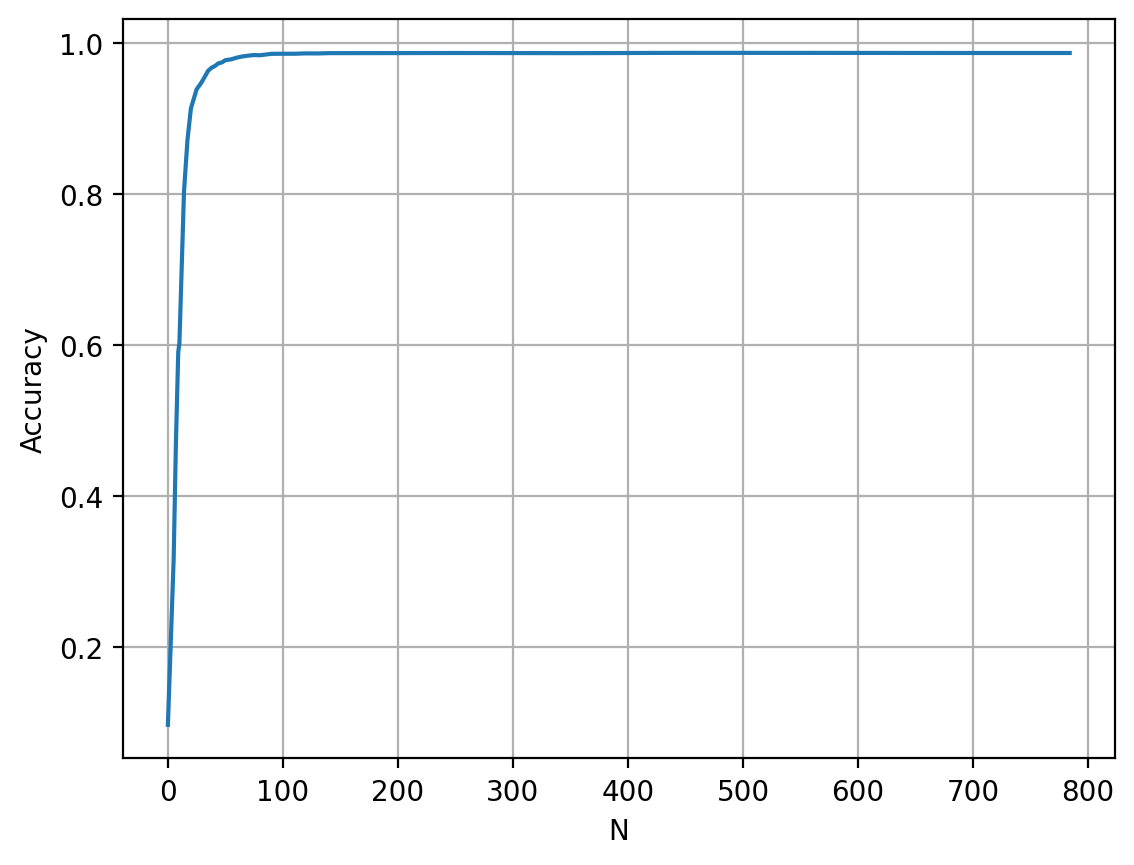

In [ ]:
test_accuracies = []

for i in N:
  P = np.dot(x, vecs)
  new_TestImageN = np.dot(P[:, 0:i], vecs.T[0:i, :]) + mu
  new_TestImageN_reshaped = np.reshape(new_TestImageN, (-1, 28, 28, 1))  # Reshape for model input
  test_loss, test_acc = model.evaluate(new_TestImageN_reshaped, test_labels, verbose=2)
  test_accuracies.append(test_acc)

fig, ax = plt.subplots()
ax.plot(N, test_accuracies)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.grid()
plt.show()

## Comment:

Comparing this graph with the one above, we can see that both are very similar, with similar curve trends. The final accuracies differ by only 0.24% and in both plots the first 50 components contribute most of the accuracy.

6. Finally repeat steps 4 and 5 using a network trained with the best 20 components

Similar to step 4, I used the first 20 PCA components as these components contributed the most variance to the data.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(14, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(28, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(28, activation='relu'))
model.add(keras.layers.Dense(10))

model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels), batch_size = 220)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 14)        140       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 14)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 28)        3556      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 28)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 28)          7084      
                                                                 
 flatten_1 (Flatten)         (None, 252)              

In [ ]:
# Perform PCA decomposition on the training dataset
X_train = np.reshape(train_images, (60000, 784))
mu_train = np.mean(X_train, axis=0)
x_train = X_train - mu_train
rho_train = np.cov(x_train, rowvar=False)  # Covariance matrix

# Get the eigenvalues and eigenvectors
vals_train, vecs_train = linalg.eigh(rho_train)
vecs_train = np.flip(vecs_train, axis=1)  # Reversed order to get descending order of eigenvalues
vals_train = np.flip(vals_train)

# Project the training data onto the selected components
P = np.dot(x_train, vecs_train)
new_TrainImage = np.dot(P[:, :20], vecs_train.T[:20, :]) + mu_train

# Reshape the projected training data to match the input shape expected by the model
new_TrainImage = new_TrainImage.reshape((60000, 28, 28, 1))

history = model.fit(new_TrainImage, train_labels, epochs=5,
                    validation_data=(test_images, test_labels), batch_size = 220)

Epoch 1/5
273/273 [==============================] - 23s 81ms/step - loss: 0.1595 - accuracy: 0.9490 - val_loss: 10.7618 - val_accuracy: 0.9779
Epoch 2/5
273/273 [==============================] - 25s 91ms/step - loss: 0.1286 - accuracy: 0.9595 - val_loss: 10.8469 - val_accuracy: 0.9795
Epoch 3/5
273/273 [==============================] - 23s 86ms/step - loss: 0.1124 - accuracy: 0.9647 - val_loss: 11.9453 - val_accuracy: 0.9782
Epoch 4/5
273/273 [==============================] - 23s 84ms/step - loss: 0.1034 - accuracy: 0.9666 - val_loss: 14.0937 - val_accuracy: 0.9772
Epoch 5/5
273/273 [==============================] - 23s 84ms/step - loss: 0.0957 - accuracy: 0.9702 - val_loss: 12.8969 - val_accuracy: 0.9788


313/313 - 2s - loss: 993.6205 - accuracy: 0.0974 - 2s/epoch - 5ms/step
313/313 - 1s - loss: 575.2840 - accuracy: 0.2588 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 397.3254 - accuracy: 0.4332 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 258.5601 - accuracy: 0.5544 - 2s/epoch - 5ms/step
313/313 - 1s - loss: 232.2145 - accuracy: 0.5917 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 78.3729 - accuracy: 0.8319 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 43.5780 - accuracy: 0.9067 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 30.6328 - accuracy: 0.9321 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 19.1642 - accuracy: 0.9561 - 2s/epoch - 5ms/step
313/313 - 2s - loss: 15.8670 - accuracy: 0.9644 - 2s/epoch - 5ms/step
313/313 - 1s - loss: 15.0532 - accuracy: 0.9674 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 14.2351 - accuracy: 0.9706 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 14.3216 - accuracy: 0.9724 - 2s/epoch - 7ms/step
313/313 - 1s - loss: 13.2635 - accuracy: 0.9731 - 1s/epoch - 5ms/step
313/313 - 1s - 

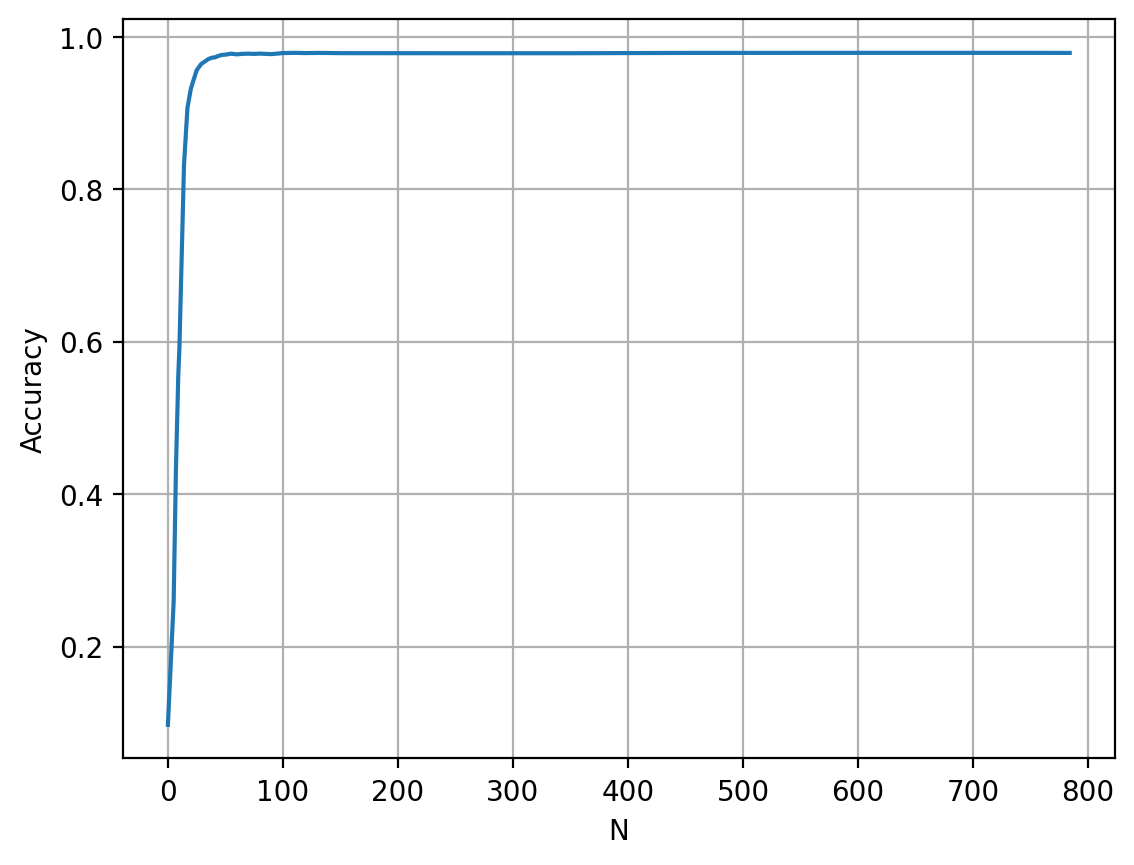

In [ ]:
test_accuracies = []

for i in N:
  P = np.dot(x, vecs)
  new_TestImageN = np.dot(P[:, 0:i], vecs.T[0:i, :]) + mu
  new_TestImageN_reshaped = np.reshape(new_TestImageN, (-1, 28, 28, 1))  # Reshape for model input
  test_loss, test_acc = model.evaluate(new_TestImageN_reshaped, test_labels, verbose=2)
  test_accuracies.append(test_acc)

fig, ax = plt.subplots()
ax.plot(N, test_accuracies)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.grid()
plt.show()

# Conclusion:

In conclusion, comparing the graphs for 100 PCA's and 20 PCA's, we can see that the trend of the curves are very simliar, however, the 20 PCA plot had a final accuracy of 97.88%, whereas, the 100 PCA plot had a final accuracy of 98.73%. This highlights that while training the network with fewer PCA components reduces system complexity, it also diminishes the final accuracy of the model.